## Descarga y formatting del CSV de los datos

In [15]:
import cv2
import numpy
import pandas
import imageio.v3 as io

from tqdm import tqdm
from typing import Optional, Union

In [22]:
data = pandas.read_csv("airbnb-listings.csv", sep = ';')
data = data.dropna(subset=['price'])
data.head(1).T

,0
id,3781
listing_url,https://www.airbnb.com/rooms/3781
scrape_id,20231218233145
last_scraped,2023-12-19
source,city scrape
...,...
calculated_host_listings_count,1
calculated_host_listings_count_entire_homes,1
calculated_host_listings_count_private_rooms,0
calculated_host_listings_count_shared_rooms,0


In [17]:
# ¿De qué variables disponemos?
data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source',
       'picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'ava

## Descarga de imágenes

In [18]:
def download_images(paths: list,
                    canvas: tuple = (224, 224),
                    nb_channels: int = 3,
                    max_imgs: Optional[int] = None
                    ) -> tuple:
  """ Download a list of images from url adresses, converting them to a specific
  canvas size.

  Args:
    paths: Paths or url adresses from which to load images.
    canvas: Desired image width and height.
    nb_channels: Channels in images (1 for B/W, 3 for RGB).
    max_imgs: Upper threshold in the number of images to download.

  Return:
    a tuple of:
      - image values
      - indices within the paths that were successfull.

  """
  n_images = len(paths) if not max_imgs else max_imgs
  images = numpy.zeros((n_images, canvas[0], canvas[1], nb_channels),
                       dtype=numpy.uint8)
  downloaded_idxs = []

  for i_img, url in enumerate(tqdm(paths, total=n_images)):
    if i_img >= n_images:
      break
    try:
        img = io.imread(url)
        img = cv2.resize(img, (canvas[0], canvas[1]))
        downloaded_idxs.append(i_img)
        images[i_img] = img
    except:  # Unavailable url / conversion error
        pass
  return images[downloaded_idxs], downloaded_idxs

Normalización y conversión en el rango [0, 1]

In [23]:
#images, idxs = download_images(data['Thumbnail Url'], max_imgs=100)
images, idxs = download_images(data['picture_url'], max_imgs=None)
images = images.astype("float32") / 255.
images.shape

100%|██████████| 7199/7199 [54:32<00:00,  2.20it/s]


(7105, 224, 224, 3)

Filtrado acorde en los demás datos

In [24]:
filtered_data = data.iloc[idxs]
filtered_data

,id,listing_url,scrape_id,last_scraped,source,picture_url,host_id,host_url,host_name,host_since,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/24670/b2de044...,4804,https://www.airbnb.com/users/show/4804,Frank,2008-12-03,...,4.96,4.88,4.92,NaN,f,1,1,0,0,0.23
1,5506,https://www.airbnb.com/rooms/5506,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/miso/Hosting-...,8229,https://www.airbnb.com/users/show/8229,Terry,2009-02-19,...,4.89,4.55,4.75,STR-490093,f,10,10,0,0,0.68
2,6695,https://www.airbnb.com/rooms/6695,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/38ac4797-e7a4...,8229,https://www.airbnb.com/users/show/8229,Terry,2009-02-19,...,4.95,4.51,4.71,STR-491702,f,10,10,0,0,0.73
3,8789,https://www.airbnb.com/rooms/8789,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/miso/Hosting-...,26988,https://www.airbnb.com/users/show/26988,Anne,2009-07-22,...,4.96,4.96,4.56,NaN,f,9,9,0,0,0.24
4,10813,https://www.airbnb.com/rooms/10813,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/20b5b9c9-e1f4...,38997,https://www.airbnb.com/users/show/38997,Michelle,2009-09-16,...,5.00,5.00,4.80,NaN,f,11,11,0,0,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7194,1046563598019556549,https://www.airbnb.com/rooms/1046563598019556549,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/prohost-api/H...,212359760,https://www.airbnb.com/users/show/212359760,Evonify,2018-08-29,...,5.00,5.00,5.00,Exempt: This listing is a unit that has contra...,f,77,77,0,0,1.00
7195,1046568292864752336,https://www.airbnb.com/rooms/1046568292864752336,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/prohost-api/H...,212359760,https://www.airbnb.com/users/show/212359760,Evonify,2018-08-29,...,NaN,NaN,NaN,Exempt: This listing is a unit that has contra...,f,77,77,0,0,NaN
7196,1047166785349446101,https://www.airbnb.com/rooms/1047166785349446101,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/miso/Hosting-...,233908696,https://www.airbnb.com/users/show/233908696,Together We,2019-01-02,...,NaN,NaN,NaN,STR-531165,t,2,2,0,0,NaN
7197,1047226383263246733,https://www.airbnb.com/rooms/1047226383263246733,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/prohost-api/H...,212359760,https://www.airbnb.com/users/show/212359760,Evonify,2018-08-29,...,NaN,NaN,NaN,Exempt: This listing is a unit that has contra...,f,77,77,0,0,NaN


## Guardado de los datos para posterior uso/selección

In [25]:
numpy.save('images.npy', images)
filtered_data.to_csv('filtered_data.csv', sep=';', index=False)

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
!cp images.npy /content/drive/MyDrive/images_final.npy
!cp filtered_data.csv /content/drive/MyDrive/filtered_data.csv

!ls -lah images* filtered*  # Comprobación

-rw-r--r-- 1 root root 8.2M Apr 11 20:56 filtered_data.csv
-rw-r--r-- 1 root root 4.0G Apr 11 20:55 images.npy


In [28]:
# Comprobamos a abrirlos de nuevo
saved_data = pandas.read_csv("/content/drive/MyDrive/filtered_data.csv", sep=';')
saved_imgs = numpy.load("/content/drive/MyDrive/images_final.npy") # changed images.npy to images_final.npy
saved_data.shape, saved_imgs.shape

((7105, 72), (7105, 224, 224, 3))

In [31]:
data['price'].unique()

array(['$125.00', '$135.00', '$179.00', '$91.00', '$86.00', '$266.00',
       '$100.00', '$55.00', '$80.00', '$105.00', '$140.00', '$60.00',
       '$275.00', '$71.00', '$65.00', '$328.00', '$58.00', '$62.00',
       '$139.00', '$195.00', '$300.00', '$190.00', '$187.00', '$45.00',
       '$75.00', '$180.00', '$175.00', '$213.00', '$214.00', '$689.00',
       '$115.00', '$236.00', '$132.00', '$226.00', '$295.00', '$595.00',
       '$200.00', '$184.00', '$113.00', '$519.00', '$539.00', '$197.00',
       '$425.00', '$120.00', '$70.00', '$72.00', '$449.00', '$450.00',
       '$415.00', '$119.00', '$170.00', '$76.00', '$238.00', '$69.00',
       '$995.00', '$265.00', '$500.00', '$220.00', '$130.00', '$219.00',
       '$161.00', '$349.00', '$90.00', '$215.00', '$67.00', '$149.00',
       '$280.00', '$150.00', '$650.00', '$260.00', '$46.00', '$131.00',
       '$160.00', '$47.00', '$210.00', '$122.00', '$38.00', '$35.00',
       '$42.00', '$88.00', '$110.00', '$230.00', '$240.00', '$126.00',
 

In [32]:
data['price'].str.replace("$" , "").str.replace("," , "").astype("float")

0       125.0
1       135.0
2       179.0
3        91.0
4        86.0
        ...  
7194     83.0
7195    107.0
7196    136.0
7197     83.0
7198    106.0
Name: price, Length: 7199, dtype: float64

Así, por ejemplo, cargamos y visualizamos la distribución de las etiquetas:

In [33]:
data['price_amount'] = data['price'].str.replace("$" , "").str.replace("," , "").astype("float")

In [48]:
data['price_amount'].describe(), data['price_amount'].isnull().sum()

(count     7199.000000
 mean       183.804695
 std        301.822501
 min         20.000000
 25%         81.000000
 50%        128.000000
 75%        202.000000
 max      10000.000000
 Name: price_amount, dtype: float64,
 0)

<Axes: >

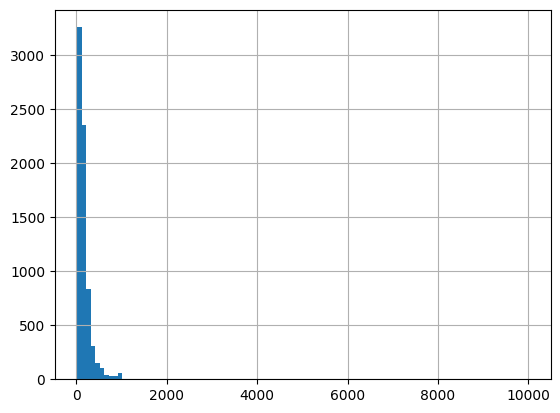

In [49]:
data['price_amount'].hist(bins=100)

Y podemos dividir por porcentajes, para crear clases, como por ejemplo:

In [50]:
data['price_amount'].describe()

count     7199.000000
mean       183.804695
std        301.822501
min         20.000000
25%         81.000000
50%        128.000000
75%        202.000000
max      10000.000000
Name: price_amount, dtype: float64

<Axes: >

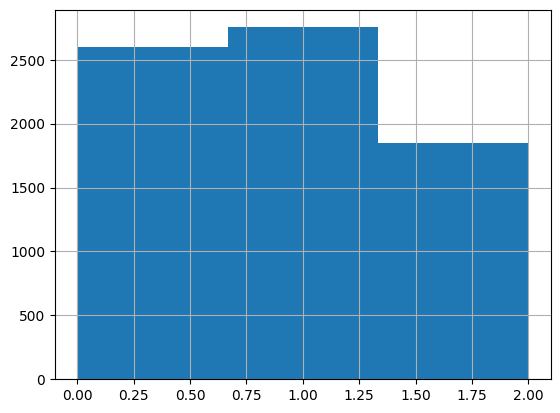

In [54]:
y_class = []
for y in data['price_amount']:
  if y <= 100:
    y_class.append(0) # Rango más barato
  elif 101 < y <= 201:
    y_class.append(1) # Rango intermedio
  else:
    y_class.append(2)
y_class = pandas.Series(y_class)
y_class.hist(bins=3)